# Boris Day 2020 Sealed Tournament Results
### A spurious statistical analysis of deck performance and SAS ratings

SAS is a popular, if imperfect way of rating keyforge decks. For more information see https://decksofkeyforge.com/about/sas.

The matter in question is "how well does it explain our tournament results?"

In [1]:
data decks;
    input name $40. place score pts_diff sas base_aerc synergy antisynergy;
    cards;
P. Pérez, Darkbourne's Talented Ears    1 4  5 81 72 10 1
Turbo, Web Keeper of the Plucky Church  2 4  6 84 74 10 0
Evans the Regularly Alarmed             3 3  4 64 59 6  1
The Explorer that Dreams about The Wise 4 2 -2 59 56 4  1
Gilmore of Kingsfall Gate               5 2 -1 64 58 6  0
Brightkin, the Cooper of Geckos         6 2 -2 64 57 7  0
Fangio the Cyclically Dashing           7 1 -2 58 54 4  0
The Warding Æmber Sentinel              8 1 -2 58 53 6  1
Xe who Largely Punishes Height          9 1 -2 62 56 7  1
;

title 'Boris Day sealed tournament decks';
title2 'Tournament results, SAS rating, and associated component measures';
proc print; run;

SAS Connection established. Subprocess id is 2327



Obs,name,place,score,pts_diff,sas,base_aerc,synergy,antisynergy
1,"P. Pérez, Darkbourne's Talented Ears",1,4,5,81,72,10,1
2,"Turbo, Web Keeper of the Plucky Church",2,4,6,84,74,10,0
3,Evans the Regularly Alarmed,3,3,4,64,59,6,1
4,The Explorer that Dreams about The Wise,4,2,-2,59,56,4,1
5,Gilmore of Kingsfall Gate,5,2,-1,64,58,6,0
6,"Brightkin, the Cooper of Geckos",6,2,-2,64,57,7,0
7,Fangio the Cyclically Dashing,7,1,-2,58,54,4,0
8,The Warding Æmber Sentinel,8,1,-2,58,53,6,1
9,Xe who Largely Punishes Height,9,1,-2,62,56,7,1


### Deck placement by SAS and AERC

It's clear at a glance that the top two decks are far and away the highest rated, but if you eliminate those two, the relationship between SAS and tournament placement is actually pretty muddled.

Interestingly, plotting placement against base AERC instead makes the relationship much more clear, at least to my eye.


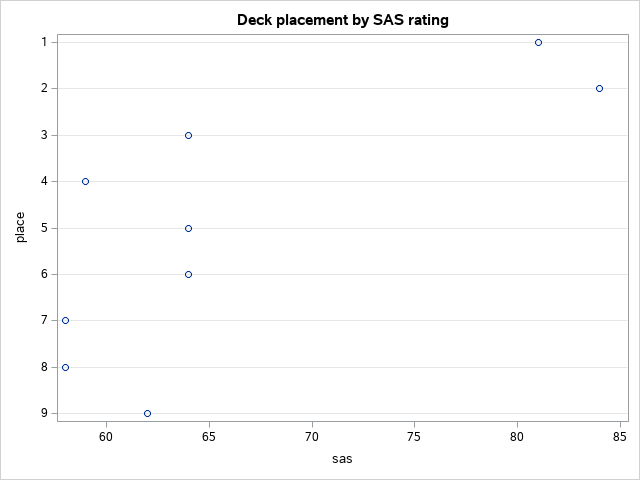
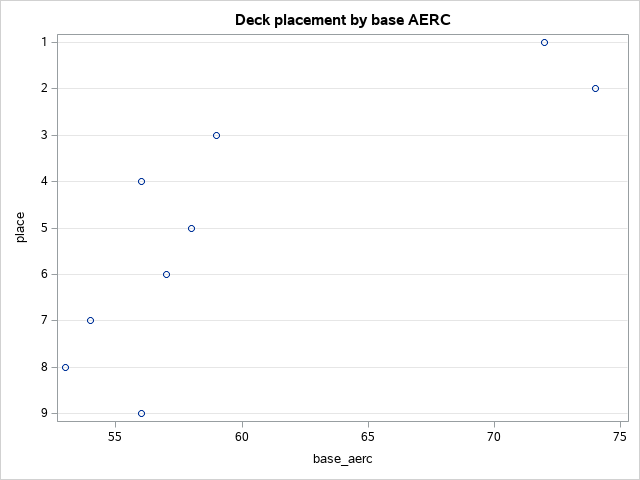

In [2]:
title 'Deck placement by SAS rating';
proc sgplot data=decks;
    scatter x = sas y = place;
    yaxis type=discrete grid reverse;
run;

title 'Deck placement by base AERC';
proc sgplot data=decks;
    scatter x = base_aerc y = place;
    yaxis type=discrete grid reverse;
run;

### This is the spurious part

##### Modeling tournament placement by SAS rating

Ok, we don't really have the sample size to support any serious statistical modeling, but I never get the chance to do ordinal regression, so why not.

Multinomial cumulative logistic regression ~~shows~~ suggests that the SAS rating actually does a decent job of explaining tournament placement.

In [3]:
title 'Modeling tournament placement with deck SAS rating';
proc logistic data=decks;
    class place;
    model place = sas;
run;


##### Modeling tournament placement by base AERC

However, the model using just the base AERC fits ~~significantly~~ noticeably better, which is in line with what I expect based on the exploratory graphs.

In [4]:
title 'Modeling tournament placement with deck base AERC';
proc logistic data=decks;
    class place;
    model place = base_aerc;
run;

### And now, some wild speculation

I've always figured that it must be hard to create an algorithm that accurately evaluates the complex synergies that exist among a deck's cards, and comparatively easier to simply rate each individual card's strengths. These results don't really prove or disprove that line of thinking, but they are consistent with it.

I also suspect that synergies matter less in the environment of a sealed tournament than they usually do. It often takes a couple of games to get a feel for how to pull off any complex combos in a deck, so unless you're a highly experienced Keyforge player you might just be getting the hang of your deck toward the end of the tournament. A deck that simply has a lot of high-æmber cards may overperform in the sealed environment relative to one that relies on setting up a combos across houses and turns.

Of course, random chance and varying player experience (as well as the aforementioned miniscule sample size) are good reasons to take all of this with a grain of salt :P
